In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 5269.667079793925, RMSE: 72.59247261110428


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 46.9739
Iteration  200 | Loss = 45.7080
Iteration  300 | Loss = 45.3560
Iteration  400 | Loss = 45.2509
Iteration  500 | Loss = 45.2196
Iteration  600 | Loss = 45.2102
Iteration  700 | Loss = 45.2075
Iteration  800 | Loss = 45.2066
Iteration  900 | Loss = 45.2064
Iteration 1000 | Loss = 45.2063
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 12830.076777765531, RMSE: 113.26992883270269
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 41.5749
Iteration  200 | Loss = 40.5887
Iteration  300 | Loss = 40.4374
Iteration  400 | Loss = 40.3972
Iteration  500 | Loss = 40.3843
Iteration  600 | Loss = 40.3800
Iteration  700 | Loss = 40.3785
Iteration  800 | Loss = 40.3780
Iteration  900 | Loss = 40.3779
Iteration 1000 | Loss = 40.3778
Fittin

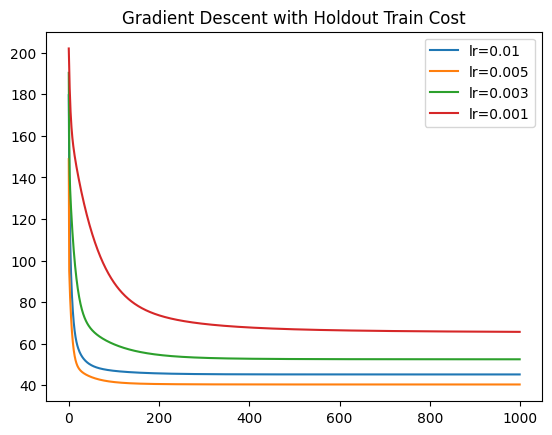

In [9]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [10]:
print(gd_hld_opt_model)

{'rmse': 49.87847201580311, 'lr': 0.001, 'w': array([-59.17785453,  68.1029359 , 346.52777139, 435.63267698,
       171.76071781, 111.57090364, 214.70742262])}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 58.4619
Iteration  200 | Loss = 58.1813
Iteration  300 | Loss = 58.1639
Iteration  400 | Loss = 58.1641
Iteration  500 | Loss = 58.1647
Iteration  600 | Loss = 58.1650
Iteration  700 | Loss = 58.1651
Iteration  800 | Loss = 58.1652
Iteration  900 | Loss = 58.1652
Iteration 1000 | Loss = 58.1652
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4481.930753065437, RMSE: 66.94722363971069
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.6518
Iteration  200 | Loss = 64.2737
Iteration  300 | Loss = 63.9211
Iteration  400 | Loss = 63.7296
Iteration  500 | Loss = 63.6112
Iteration  600 | Loss = 63.5362
Iteration  700 | Loss = 63.4884
Iteration  800 | Loss = 63.4577
Iteration  900 | Loss = 63.4379
Iteration 1000 | Loss = 63.425

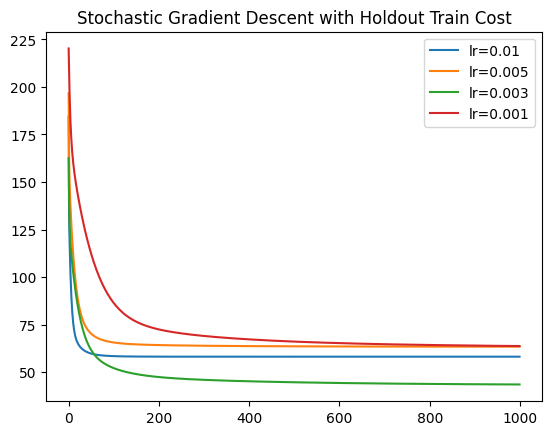

In [12]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [13]:
print(sgd_hld_opt_model)

{'rmse': 50.081032076469434, 'lr': 0.001, 'w': array([-55.91606915,  68.17617391, 375.96659968, 412.31269146,
       178.91006436,  28.34363159, 260.0407997 ])}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 63.4533
Iteration  200 | Loss = 62.9300
Iteration  300 | Loss = 62.7868
Iteration  400 | Loss = 62.7375
Iteration  500 | Loss = 62.7203
Iteration  600 | Loss = 62.7142
Iteration  700 | Loss = 62.7120
Iteration  800 | Loss = 62.7113
Iteration  900 | Loss = 62.7110
Iteration 1000 | Loss = 62.7109
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2818.8973576504304, RMSE: 53.093289196003205
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 59.5878
Iteration  200 | Loss = 58.1546
Iteration  300 | Loss = 57.8208
Iteration  400 | Loss = 57.7214
Iteration  500 | Loss = 57.6910
Iteration  600 | Loss = 57.6817
Iteration  700 | Loss = 57.6788
Iteration  800 | Loss = 57.6779
Iteration  900 | Loss = 57.6776
Iteration 1000 | Loss = 57.6776
Fit

In [15]:
print(gd_montc_opt_model)

{'rmse': 63.047693555606635, 'lr': 0.003, 'w': array([-59.22439509,  77.30870535, 376.13371709, 460.30203745,
       220.90419378, -19.07255231, 219.30882149])}


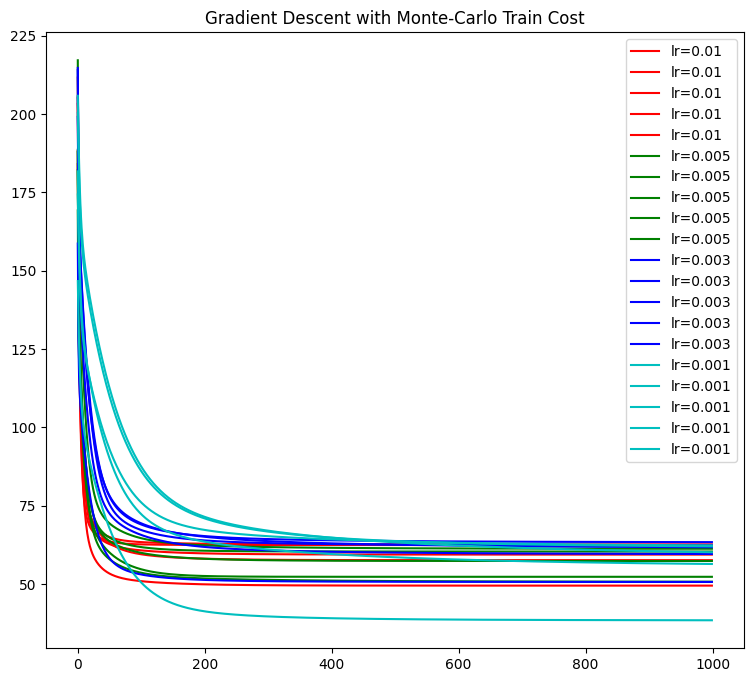

In [16]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 56.6708
Iteration  200 | Loss = 56.2961
Iteration  300 | Loss = 56.2849
Iteration  400 | Loss = 56.2939
Iteration  500 | Loss = 56.2989
Iteration  600 | Loss = 56.3009
Iteration  700 | Loss = 56.3017
Iteration  800 | Loss = 56.3020
Iteration  900 | Loss = 56.3021
Iteration 1000 | Loss = 56.3022
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4946.935224478915, RMSE: 70.33445261377183
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.1508
Iteration  200 | Loss = 56.3007
Iteration  300 | Loss = 56.0627
Iteration  400 | Loss = 55.9865
Iteration  500 | Loss = 55.9642
Iteration  600 | Loss = 55.9594
Iteration  700 | Loss = 55.9596
Iteration  800 | Loss = 55.9609
Iteration  900 | Loss = 55.9621
Iteration 1000 | Loss = 55.

In [18]:
print(sgd_montc_opt_model)

{'rmse': 64.36008648634187, 'lr': 0.01, 'w': array([-53.19147798,  74.65089096, 537.39613222, 324.48463708,
       170.76647745, -39.83491609, 279.58863197])}


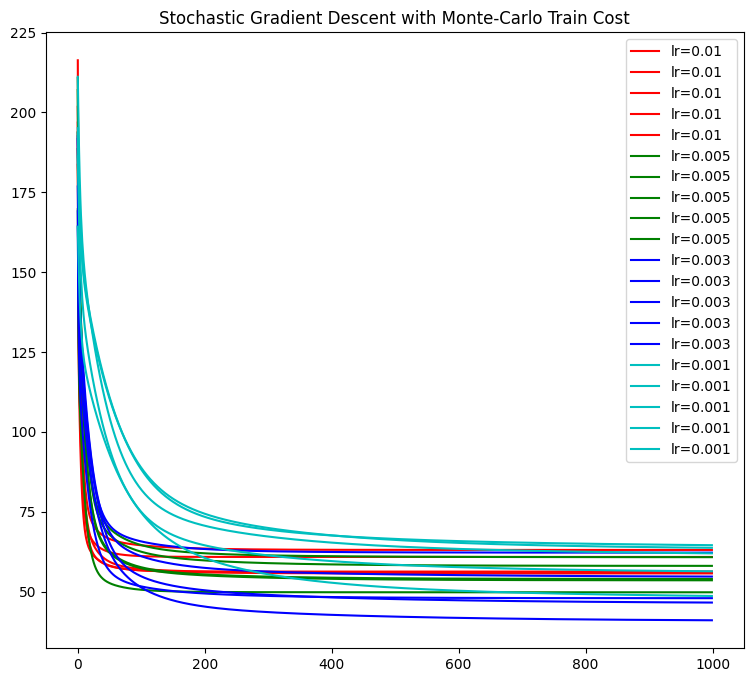

In [19]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 47.8189
Iteration  200 | Loss = 47.6858
Iteration  300 | Loss = 47.6734
Iteration  400 | Loss = 47.6718
Iteration  500 | Loss = 47.6716
Iteration  600 | Loss = 47.6715
Iteration  700 | Loss = 47.6715
Iteration  800 | Loss = 47.6715
Iteration  900 | Loss = 47.6715
Iteration 1000 | Loss = 47.6715
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 11934.293969460963, RMSE: 109.24419421397626
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.8636
Iteration  200 | Loss = 62.1555
Iteration  300 | Loss = 61.9358
Iteration  400 | Loss = 61.8629
Iteration  500 | Loss = 61.8386
Iteration  600 | Loss = 61.8305
Iteration  700 | Loss = 61.8278
Iteration  800 | Loss = 61.8269
Iteration  900 | Loss = 61.8266
Iteration 1000 | Loss = 61.8265
Fitting 

In [21]:
print(gd_kfold_opt_model)

{'rmse': 63.00488879710937, 'lr': 0.005, 'w': array([-31.9518825 ,  41.39709995, 217.85072268, 287.31021438,
       155.11315297,  39.46790705, 211.24438754])}


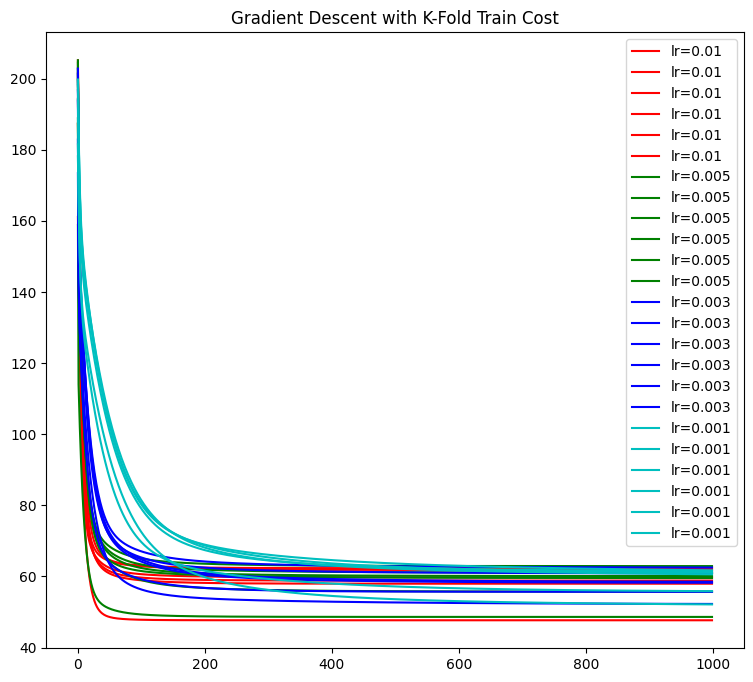

In [22]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_kfold_train_costs)):
    for j in range(len(gd_kfold_train_costs[i])):
        plt.plot(gd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.6469
Iteration  200 | Loss = 60.7886
Iteration  300 | Loss = 60.5861
Iteration  400 | Loss = 60.5340
Iteration  500 | Loss = 60.5207
Iteration  600 | Loss = 60.5174
Iteration  700 | Loss = 60.5167
Iteration  800 | Loss = 60.5166
Iteration  900 | Loss = 60.5166
Iteration 1000 | Loss = 60.5167
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2931.2176263578694, RMSE: 54.1407205932639
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 55.0391
Iteration  200 | Loss = 54.7919
Iteration  300 | Loss = 54.7812
Iteration  400 | Loss = 54.7803
Iteration  500 | Loss = 54.7801
Iteration  600 | Loss = 54.7801
Iteration  700 | Loss = 54.7801
Iteration  800 | Loss = 54.7801
Stopping criteria satisfied at iteration 843.
Fitting completed.

In [24]:
print(sgd_kfold_opt_model)

{'rmse': 62.13831645346287, 'lr': 0.003, 'w': array([-60.98264488,  76.36185559, 436.26427938, 424.45631153,
       153.03350668, -31.94191014, 258.78692337])}


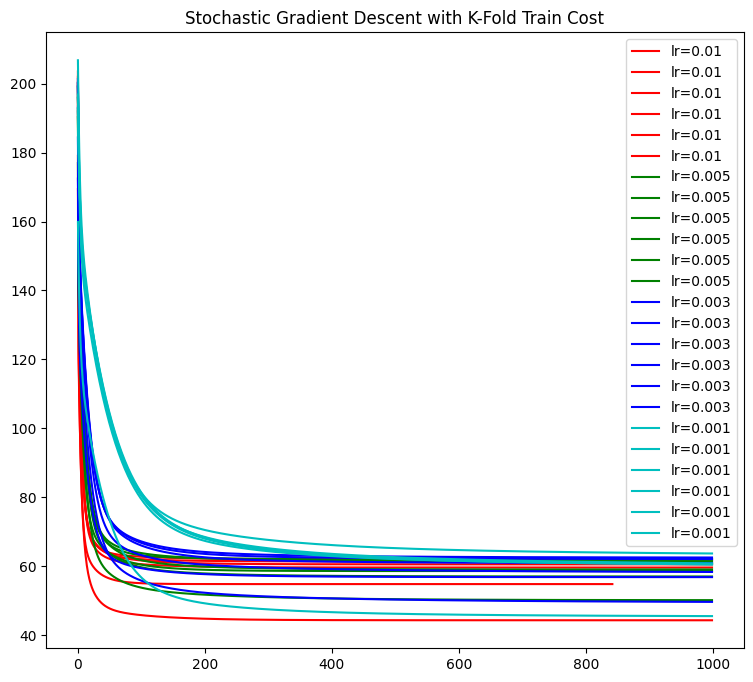

In [25]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_kfold_train_costs)):
    for j in range(len(sgd_kfold_train_costs[i])):
        plt.plot(sgd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')